In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('Adult2_Training', sep='\t', lineterminator='\r')
#df_test = pd.read_csv('Adult2_Test.txt', sep='\t', lineterminator='\r')

In [4]:
df['Age_mm'] = df['Age_mm'].str.replace('\n','')
df_test['Age_mm'] = df_test['Age_mm'].str.replace('\n','')
df_test.head()

NameError: name 'df_test' is not defined

In [61]:
df.shape

(18762, 13)

In [63]:
df.isna().any()

Age_mm                     False
Years of education_mm       True
Hours_mm                    True
Capital gains_mm            True
Capital losses_mm           True
Marital status              True
Work Class                  True
Gender                      True
Race                        True
Income                      True
Abs(CapGains+Losses)        True
Capital Gains or Losses     True
Training                    True
dtype: bool

In [87]:
df = df.dropna(how='any',axis=0) 
df.shape

(18761, 13)

In [88]:
# Checking class balance
df['Capital Gains or Losses'].value_counts()

F    16346
T     2415
Name: Capital Gains or Losses, dtype: int64

In [89]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]] = enc.fit_transform(df[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]])
#df_test[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]] = enc.fit_transform(df_test[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]])

/var/folders/1y/cp84b1jn2f16p5scv8xkzyzh0000gn/T/ipykernel_24183/3743074562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]] = enc.fit_transform(df[["Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]])


In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df = df[["Age_mm","Years of education_mm","Hours_mm","Capital gains_mm","Capital losses_mm","Abs(CapGains+Losses)","Marital status","Work Class","Gender","Race","Income","Capital Gains or Losses"]]
#X[["Age_mm","Years of education_mm","Hours_mm","Capital gains_mm","Capital losses_mm","Abs(CapGains+Losses)"]] = sc.fit_transform(X[["Int'l Plan","VMail Plan","Day Mins","Day Calls","Eve Mins","Eve Calls","Night Mins","Night Calls","Intl Mins","Intl Calls"]])


In [94]:
df

,Age_mm,Years of education_mm,Hours_mm,Capital gains_mm,Capital losses_mm,Abs(CapGains+Losses),Marital status,Work Class,Gender,Race,Income,Capital Gains or Losses
0,0.301370,0.800000,0.397959,0.02174,0.0,0.02174,2.0,0.0,1.0,4.0,0.0,1.0
1,0.287671,0.533333,0.397959,0.00000,0.0,0.00000,0.0,2.0,1.0,4.0,0.0,0.0
2,0.493151,0.400000,0.397959,0.00000,0.0,0.00000,1.0,2.0,1.0,2.0,0.0,0.0
3,0.273973,0.866667,0.397959,0.00000,0.0,0.00000,1.0,2.0,0.0,4.0,0.0,0.0
4,0.438356,0.266667,0.153061,0.00000,0.0,0.00000,1.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18756,0.506849,0.600000,0.551020,0.00000,0.0,0.00000,0.0,2.0,1.0,4.0,0.0,0.0
18757,0.205479,0.533333,0.397959,0.00000,0.0,0.00000,1.0,2.0,1.0,4.0,0.0,0.0
18758,0.328767,0.333333,0.602041,0.00000,0.0,0.00000,1.0,2.0,1.0,4.0,0.0,0.0
18759,0.219178,0.533333,0.418367,0.00000,0.0,0.00000,0.0,2.0,0.0,4.0,0.0,0.0


In [95]:
cluster1 = df.loc[df['Capital Gains or Losses'] == 0.0]
cluster2 = df.loc[df['Capital Gains or Losses'] == 1.0]

cluster1t = df_test.loc[df_test['Capital Gains or Losses'] == 0.0]
cluster2t = df_test.loc[df_test['Capital Gains or Losses'] == 1.0]

In [104]:
df_test

,Age_mm,Years of education_mm,Hours_mm,Capital gains_mm,Capital losses_mm,Marital status,Work Class,Gender,Race,Income,Abs(CapGains+Losses),Capital Gains or Losses
0,0.150685,0.800000,0.397959,0.000000,0.0,1.0,2.0,0.0,2.0,0.0,0.000000,0.0
1,0.342466,0.800000,0.397959,0.051781,0.0,1.0,2.0,1.0,4.0,1.0,0.051781,1.0
2,0.205479,0.733333,0.500000,0.000000,0.0,2.0,2.0,1.0,2.0,0.0,0.000000,0.0
3,0.356164,0.866667,0.448980,0.000000,0.0,0.0,3.0,0.0,4.0,1.0,0.000000,0.0
4,0.315068,1.000000,0.602041,0.000000,0.0,1.0,2.0,1.0,4.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6150,0.109589,0.400000,0.397959,0.000000,0.0,1.0,2.0,1.0,4.0,0.0,0.000000,0.0
6151,0.424658,0.800000,0.500000,0.000000,0.0,2.0,2.0,1.0,4.0,0.0,0.000000,0.0
6152,0.547945,0.600000,0.397959,0.000000,0.0,0.0,0.0,0.0,4.0,0.0,0.000000,0.0
6153,0.027397,0.533333,0.397959,0.000000,0.0,2.0,2.0,1.0,4.0,0.0,0.000000,0.0


In [97]:
columns = list(cluster1.columns)
columns.remove('Age_mm')
means = pd.DataFrame({'Fields': columns,'Cluster-1':list(cluster1.mean()),'Cluster-2':list(cluster2.mean())})
print(means)

                     Fields  Cluster-1  Cluster-2
0     Years of education_mm   0.596896   0.663934
1                  Hours_mm   0.397687   0.432154
2          Capital gains_mm   0.000000   0.085379
3         Capital losses_mm   0.000000   0.155302
4      Abs(CapGains+Losses)   0.000000   0.240681
5            Marital status   1.369876   1.187992
6                Work Class   1.959011   1.944513
7                    Gender   0.655940   0.768530
8                      Race   3.664994   3.727122
9                    Income   0.191668   0.561905
10  Capital Gains or Losses   0.000000   1.000000


/var/folders/1y/cp84b1jn2f16p5scv8xkzyzh0000gn/T/ipykernel_24183/13901468.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = pd.DataFrame({'Fields': columns,'Cluster-1':list(cluster1.mean()),'Cluster-2':list(cluster2.mean())})


              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85      4674
         1.0       0.52      0.33      0.40      1481

    accuracy                           0.77      6155
   macro avg       0.67      0.62      0.63      6155
weighted avg       0.74      0.77      0.75      6155



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Abs(CapGains+Losses)

  warnings.warn(message, FutureWarning)


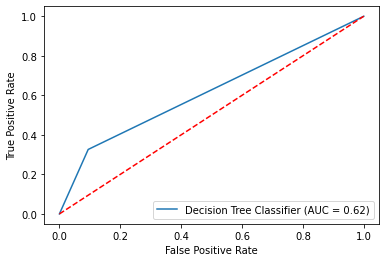

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      4362
         1.0       0.31      0.17      0.22      1034

    accuracy                           0.77      5396
   macro avg       0.56      0.54      0.54      5396
weighted avg       0.72      0.77      0.74      5396



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Abs(CapGains+Losses)

  warnings.warn(message, FutureWarning)


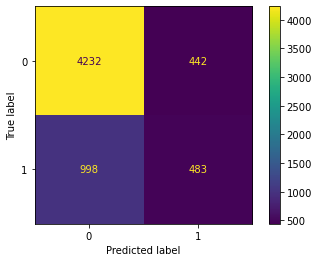

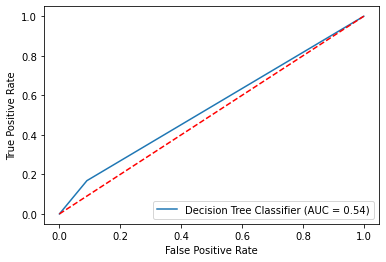

              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74       312
         1.0       0.87      0.69      0.77       447

    accuracy                           0.75       759
   macro avg       0.76      0.77      0.75       759
weighted avg       0.78      0.75      0.76       759



/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Abs(CapGains+Losses)

  warnings.warn(message, FutureWarning)


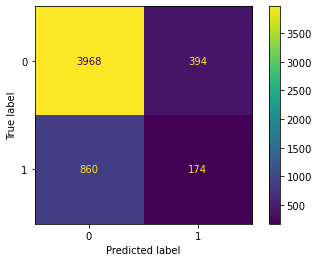

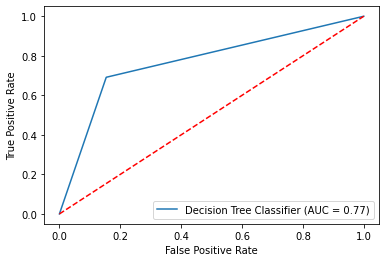

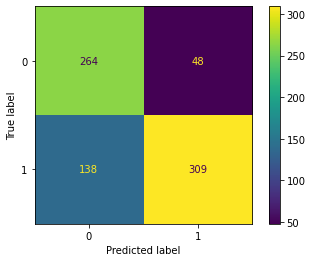

In [108]:

X_train = df.iloc[:, 0:10]
y_train = df.iloc[:,-2]
X_test = df_test.iloc[:, 0:10]
y_test = df_test.iloc[:,-3]
#Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()


X = cluster1.iloc[:, 0:10]
y = cluster1.iloc[:,-2]
X_test = cluster1t.iloc[:, 0:10]
y_test = cluster1t.iloc[:,-3]
dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

X = cluster2.iloc[:, 0:10]
y = cluster2.iloc[:,-2]
X_test = cluster2t.iloc[:, 0:10]
y_test = cluster2t.iloc[:,-3]
dtclf = DecisionTreeClassifier(random_state = 12) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()


ANALYSIS:

Group Classification Model:
AUC = 0.62

Cluster1 (2415) AUC = 0.54
Cluster2 (16346)  AUC = 0.77
Average AUC Segmentation = 1304+12586/18761 = 0.74
